In [35]:
import pandas as pd
import numpy as np

In [36]:
aqi22 = pd.read_csv(r"Downloads\aqi.csv")

In [37]:
aqi22.columns

Index(['name', 'Timestamp', 'End date', 'Time', 'Year', 'Month', 'Day',
       'Weekend', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
       'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'AT (°C)',
       'RH (%)', 'WS (m/s)', 'WD (deg)', 'TOT-RF (mm)', 'SR (W/mt2)',
       'BP (mmHg)', 'Season', 'PM10_24hr_avg', 'PM2.5_24hr_avg',
       'SO2_24hr_avg', 'NO2_24hr_avg', 'CO_8hr_max', 'O3_8hr_max',
       'NH3_24hr_avg', 'PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex',
       'NO2_SubIndex', 'CO_SubIndex', 'O3_SubIndex', 'NH3_SubIndex', 'Checks',
       'AQI_calculated', 'AQI_bucket_calculated'],
      dtype='object')

In [38]:
aqi22['AQI_bucket_calculated'].value_counts()

Moderate        67392
Satisfactory    52521
Good            16184
Poor            15822
Very Poor       15603
Severe           7714
Name: AQI_bucket_calculated, dtype: int64

In [39]:
df_predict = aqi22.copy()

In [ ]:
# LABEL ENCODING

In [40]:
from sklearn.preprocessing import LabelEncoder



# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
df_predict ['AQI_bucket_calculated'] = label_encoder.fit_transform(df_predict['AQI_bucket_calculated'])


print("Encoded classes:", label_encoder.classes_)

Encoded classes: ['Good' 'Moderate' 'Poor' 'Satisfactory' 'Severe' 'Very Poor' nan]


In [41]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
df_predict ['Month'] = label_encoder.fit_transform(df_predict['Month'])

print("Encoded classes:", label_encoder.classes_)

Encoded classes: [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [42]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
df_predict ['name'] = label_encoder.fit_transform(df_predict['name'])


print("Encoded classes:", label_encoder.classes_)

Encoded classes: ['bangalore' 'delhi' 'hyderbad' 'kolkota']


In [43]:
from sklearn.preprocessing import LabelEncoder



# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
df_predict ['Time'] = label_encoder.fit_transform(df_predict['Time'])

r.classes_)

Encoded classes: ['00:00:00' '01:00:00' '02:00:00' '03:00:00' '04:00:00' '05:00:00'
 '06:00:00' '07:00:00' '08:00:00' '09:00:00' '10:00:00' '11:00:00'
 '12:00:00' '13:00:00' '14:00:00' '15:00:00' '16:00:00' '17:00:00'
 '18:00:00' '19:00:00' '20:00:00' '21:00:00' '22:00:00' '23:00:00']


In [44]:
from sklearn.preprocessing import LabelEncoder



# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
df_predict ['Season'] = label_encoder.fit_transform(df_predict['Season'])


print("Encoded classes:", label_encoder.classes_)

Encoded classes: ['Autumn' 'Spring' 'Summer' 'Winter']


In [45]:
df_predict.columns

Index(['name', 'Timestamp', 'End date', 'Time', 'Year', 'Month', 'Day',
       'Weekend', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
       'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'AT (°C)',
       'RH (%)', 'WS (m/s)', 'WD (deg)', 'TOT-RF (mm)', 'SR (W/mt2)',
       'BP (mmHg)', 'Season', 'PM10_24hr_avg', 'PM2.5_24hr_avg',
       'SO2_24hr_avg', 'NO2_24hr_avg', 'CO_8hr_max', 'O3_8hr_max',
       'NH3_24hr_avg', 'PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex',
       'NO2_SubIndex', 'CO_SubIndex', 'O3_SubIndex', 'NH3_SubIndex', 'Checks',
       'AQI_calculated', 'AQI_bucket_calculated'],
      dtype='object')

In [ ]:
df_predict.fillna(0, inplace=True)  # fill missing values with 0

In [47]:
df_predict.isnull().sum()

name                     0
Timestamp                0
End date                 0
Time                     0
Year                     0
Month                    0
Day                      0
Weekend                  0
PM2.5 (µg/m³)            0
PM10 (µg/m³)             0
NO (µg/m³)               0
NO2 (µg/m³)              0
NOx (ppb)                0
NH3 (µg/m³)              0
SO2 (µg/m³)              0
CO (mg/m³)               0
Ozone (µg/m³)            0
Benzene (µg/m³)          0
Toluene (µg/m³)          0
AT (°C)                  0
RH (%)                   0
WS (m/s)                 0
WD (deg)                 0
TOT-RF (mm)              0
SR (W/mt2)               0
BP (mmHg)                0
Season                   0
PM10_24hr_avg            0
PM2.5_24hr_avg           0
SO2_24hr_avg             0
NO2_24hr_avg             0
CO_8hr_max               0
O3_8hr_max               0
NH3_24hr_avg             0
PM2.5_SubIndex           0
PM10_SubIndex            0
SO2_SubIndex             0
N

In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler


# Separate features (X) and target variable (y)
X = data.drop(['AQI_calculated'], axis=1)  # Assuming 'AQI_calculated' is the target variable
y = data['AQI_calculated']

# Initialize TimeSeriesSplit for time series splitting
tscv = TimeSeriesSplit(n_splits=5)  # Define the number of splits 

# Iterate over the time series splits
for train_index, test_index in tscv.split(X):
    # Split data into train and test sets based on indices from TimeSeriesSplit
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize Random Forest regressor for feature selection
    rf = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit Random Forest on training data to select important features
    rf.fit(X_train, y_train)

    # Get feature importances from the trained RF model
    feature_importances = rf.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]

    # Select top 'k' important features (e.g., top 15 features)
    k = 15
    selected_features = X.columns[indices[:k]]

    # Subset the data with selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]


In [76]:
 feature_importances

array([2.33769980e-06, 1.06601111e-05, 2.49406398e-06, 2.95180075e-07,
       3.90604160e-06, 3.29503086e-06, 1.84159627e-06, 3.47422387e-06,
       2.11433519e-07, 1.97447691e-06, 5.14246752e-06, 1.08844954e-06,
       2.40061347e-01, 7.29229318e-01, 6.05167217e-05, 1.61757274e-03,
       1.08825010e-02, 1.80394778e-02, 7.25463970e-05])

In [36]:
selected_features

Index(['PM2.5_24hr_avg', 'PM10_24hr_avg', 'O3_8hr_max', 'CO_8hr_max',
       'NO2_24hr_avg', 'NH3_24hr_avg', 'SO2_24hr_avg', 'Month', 'BP (mmHg)',
       'AT (°C)', 'WD (deg)', 'RH (%)', 'Day', 'Time', 'SR (W/mt2)'],
      dtype='object')

In [48]:
df_predict.columns

Index(['name', 'Timestamp', 'End date', 'Time', 'Year', 'Month', 'Day',
       'Weekend', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
       'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'AT (°C)',
       'RH (%)', 'WS (m/s)', 'WD (deg)', 'TOT-RF (mm)', 'SR (W/mt2)',
       'BP (mmHg)', 'Season', 'PM10_24hr_avg', 'PM2.5_24hr_avg',
       'SO2_24hr_avg', 'NO2_24hr_avg', 'CO_8hr_max', 'O3_8hr_max',
       'NH3_24hr_avg', 'PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex',
       'NO2_SubIndex', 'CO_SubIndex', 'O3_SubIndex', 'NH3_SubIndex', 'Checks',
       'AQI_calculated', 'AQI_bucket_calculated'],
      dtype='object')

In [50]:
df_predict2 = df_predict.drop(['Timestamp', 'End date', 'Year','name','Ozone (µg/m³)','SO2 (µg/m³)',
        'PM2.5_SubIndex','PM10_SubIndex', 'SO2_SubIndex','Weekend','WD (deg)', 'TOT-RF (mm)',
       'PM2.5_SubIndex', 'PM10_SubIndex','PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)',
       'CO (mg/m³)','NO (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)',
       'Benzene (µg/m³)', 'Toluene (µg/m³)','NH3_SubIndex',
       'SO2_SubIndex',
       'NO2_SubIndex', 'CO_SubIndex', 'O3_SubIndex', 'Checks','AQI_bucket_calculated'], axis=1)

In [51]:
df_predict2.isnull().sum()

Time              0
Month             0
Day               0
AT (°C)           0
RH (%)            0
WS (m/s)          0
SR (W/mt2)        0
BP (mmHg)         0
Season            0
PM10_24hr_avg     0
PM2.5_24hr_avg    0
SO2_24hr_avg      0
NO2_24hr_avg      0
CO_8hr_max        0
O3_8hr_max        0
NH3_24hr_avg      0
AQI_calculated    0
dtype: int64

In [52]:
df_predict2.columns

Index(['Time', 'Month', 'Day', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'SR (W/mt2)',
       'BP (mmHg)', 'Season', 'PM10_24hr_avg', 'PM2.5_24hr_avg',
       'SO2_24hr_avg', 'NO2_24hr_avg', 'CO_8hr_max', 'O3_8hr_max',
       'NH3_24hr_avg', 'AQI_calculated'],
      dtype='object')

In [53]:
# DATA SCALING 
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Specify the columns you want to scale (excluding uint8 columns)
numerical_columns = [ 'Time', 'Month', 'Day', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'SR (W/mt2)',
       'BP (mmHg)', 'Season', 'PM10_24hr_avg', 'PM2.5_24hr_avg',
       'SO2_24hr_avg', 'NO2_24hr_avg', 'CO_8hr_max', 'O3_8hr_max',
       'NH3_24hr_avg',
       ]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df_predict2[numerical_columns] = scaler.fit_transform(df_predict2[numerical_columns])

In [54]:
#data splitting 

from sklearn.model_selection import train_test_split


X = df_predict2.drop('AQI_calculated', axis=1)
y = df_predict2['AQI_calculated']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# building the hybrid TCN-LSTM model

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

try:
    # Determine the input shape
    sequence_length = X_train.shape[1] 
    num_features = 1  

    # Define TCN model 
    tcn_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, num_features)),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(1)
    ])

    # Compile the TCN model
    tcn_model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the TCN model
    tcn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

    # Reshape input data for LSTM model
    X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Define LSTM model
    lstm_model = Sequential([
        LSTM(units=64, activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
        LSTM(units=128, activation='relu', return_sequences=True),
        LSTM(units=32, activation='relu'),
        Dense(1)
    ])

    # Compile the LSTM model
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the LSTM model
    lstm_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, verbose=1)

    # Make predictions on the training set
    tcn_train_pred = tcn_model.predict(X_train)
    lstm_train_pred = lstm_model.predict(X_train_reshaped)

    # Make predictions on the test set
    tcn_test_pred = tcn_model.predict(X_test)
    lstm_test_pred = lstm_model.predict(X_test_reshaped)

    # Concatenate predictions from both models
    combined_train_pred = np.concatenate((tcn_train_pred, lstm_train_pred), axis=1)
    combined_test_pred = np.concatenate((tcn_test_pred, lstm_test_pred), axis=1)

    # Define additional layers for further processing
    additional_layers = Sequential([
        Dense(64, activation='relu'),
        Dense(1)
    ])

    # Compile the additional layers
    additional_layers.compile(optimizer='adam', loss='mean_squared_error')

    # Train the additional layers
    additional_layers.fit(combined_train_pred, y_train, epochs=100, batch_size=32, verbose=1)

    # Make predictions on the training set using the combined model
    combined_train_pred_final = additional_layers.predict(combined_train_pred)

    # Make predictions on the test set using the combined model
    combined_test_pred_final = additional_layers.predict(combined_test_pred)

    # Calculate evaluation metrics for training set
    mse_train = mean_squared_error(y_train, combined_train_pred_final)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, combined_train_pred_final)
    r2_train = r2_score(y_train, combined_train_pred_final)

    print("Evaluation Metrics for Training Set (Combined Model):")
    print("MSE:", mse_train)
    print("RMSE:", rmse_train)
    print("MAE:", mae_train)
    print("R^2 Score:", r2_train)

    # Calculate evaluation metrics for test set
    mse_test = mean_squared_error(y_test, combined_test_pred_final)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, combined_test_pred_final)
    r2_test = r2_score(y_test, combined_test_pred_final)

    print("\nEvaluation Metrics for Test Set (Combined Model):")
    print("MSE:", mse_test)
    print("RMSE:", rmse_test)
    print("MAE:", mae_test)
    print("R^2 Score:", r2_test)

except Exception as e:
    print("An error occurred:", e)


Epoch 1/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 2725.5457
Epoch 2/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 166.8619
Epoch 3/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 56.3920
Epoch 4/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 34.5481
Epoch 5/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 28.6777
Epoch 6/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 26.6846
Epoch 7/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - loss: 18.2674
Epoch 8/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - loss: 15.5414
Epoch 9/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 13.2099
Epoch 10/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - loss: 11.4321
Epoch 11/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 13.7776
Epoch 12/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - loss: 13.1678
Epoch 13/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 10.4713
Epoch 14/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step 

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - loss: 4394.9458
Epoch 2/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 99.2778
Epoch 3/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 30.5612
Epoch 4/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 22.2192
Epoch 5/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 17.1975
Epoch 6/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 14.3839
Epoch 7/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 12.4505
Epoch 8/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 10.0572
Epoch 9/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 8.8721
Epoch 10/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 7.6735
Epoch 11/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 6.2491
Epoch 12/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 5.7860
Epoch 13/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 5.6967
Epoch 14/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - loss

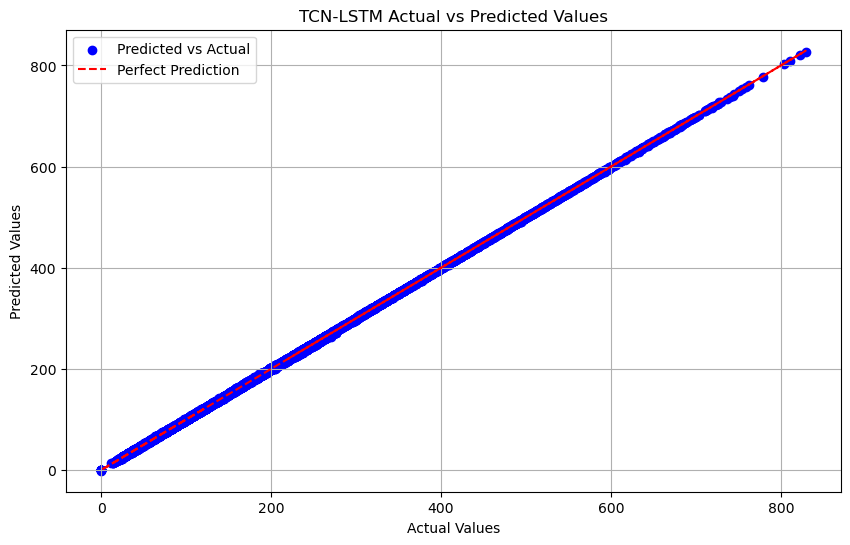

In [71]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, combined_test_pred_final, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('TCN-LSTM Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# tcn model 

In [28]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, X_test, y_train, y_test are properly formatted numpy arrays

# Determine the input shape
sequence_length = X_train.shape[1]  # Length of each sequence
num_features = 1  # Assuming each time step has only one feature

# Build TCN model
tcn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, num_features)),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(1)
])

# Compile the model
tcn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
tcn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the training set
tcn_train_pred = tcn_model.predict(X_train)

# Make predictions on the test set
tcn_test_pred = tcn_model.predict(X_test)

# Calculate evaluation metrics for training set
mse_train = mean_squared_error(y_train, tcn_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, tcn_train_pred)
r2_train = r2_score(y_train, tcn_train_pred)

print("Evaluation Metrics for Training Set:")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("R^2 Score:", r2_train)

# Calculate evaluation metrics for test set
mse_test = mean_squared_error(y_test, tcn_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, tcn_test_pred)
r2_test = r2_score(y_test, tcn_test_pred)

print("\nEvaluation Metrics for Test Set:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("R^2 Score:", r2_test)


Epoch 1/100


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


4383/4383 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 2709.9812
Epoch 2/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 129.9973
Epoch 3/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 45.7070
Epoch 4/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 30.8438
Epoch 5/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 22.1903
Epoch 6/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 19.1449
Epoch 7/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 14.6085
Epoch 8/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 11.5997
Epoch 9/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 9.6191
Epoch 10/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 10.4923
Epoch 11/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 9.1959
Epoch 12/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 16.0961
Epoch 13/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 6.5697
Epoch 14/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 6.3616


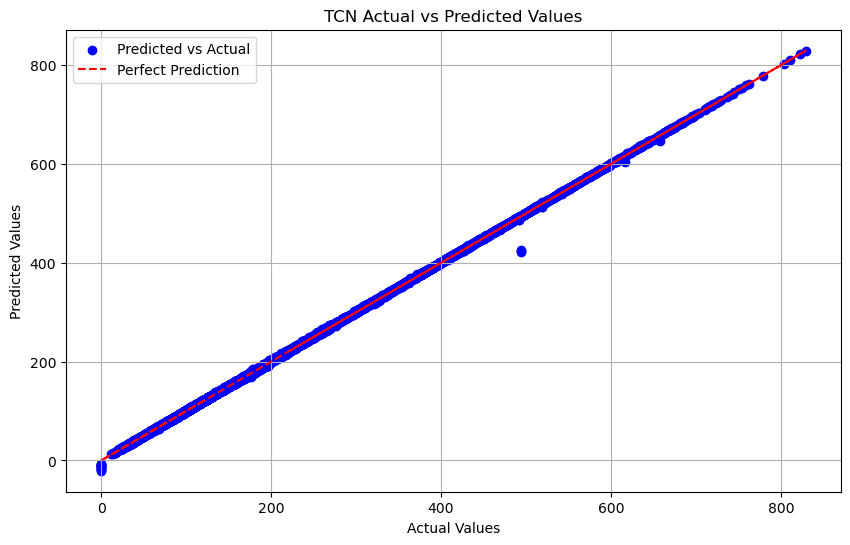

In [60]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, tcn_test_pred, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('TCN Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# lstm model  building

In [56]:
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Start time
start_time_lstm = time.time()
print("Start time (LSTM):", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time_lstm)))

# Reshape input data to 3D format
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Define LSTM model with three layers
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(LSTM(units=128, activation='relu', return_sequences=True))
lstm_model.add(LSTM(units=32, activation='relu'))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, verbose=1)

# Reshape test data
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Make predictions
lstm_predictions_train = lstm_model.predict(X_train_reshaped)
lstm_predictions_test = lstm_model.predict(X_test_reshaped)

# Calculate evaluation metrics for train set
lstm_rmse_train = np.sqrt(mean_squared_error(y_train, lstm_predictions_train))
lstm_mae_train = mean_absolute_error(y_train, lstm_predictions_train)
lstm_r2_train = r2_score(y_train, lstm_predictions_train)
lstm_mse_train = mean_squared_error(y_train, lstm_predictions_train)

# Calculate evaluation metrics for test set
lstm_rmse_test = np.sqrt(mean_squared_error(y_test, lstm_predictions_test))
lstm_mae_test = mean_absolute_error(y_test, lstm_predictions_test)
lstm_r2_test = r2_score(y_test, lstm_predictions_test)
lstm_mse_test = mean_squared_error(y_test, lstm_predictions_test)

# Print evaluation metrics for train set
print("LSTM Training RMSE:", lstm_rmse_train)
print("LSTM Training MAE:", lstm_mae_train)
print("LSTM Training R^2 score:", lstm_r2_train)
print("LSTM Training MSE score:", lstm_mse_train)

# Print evaluation metrics for test set
print("\nLSTM Test RMSE:", lstm_rmse_test)
print("LSTM Test MAE:", lstm_mae_test)
print("LSTM Test R^2 score:", lstm_r2_test)
print("LSTM Test MSE score:", lstm_mse_test)

# End time
end_time_lstm = time.time()
print("End time (LSTM):", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time_lstm)))

# Total execution time
execution_time_lstm = end_time_lstm - start_time_lstm
print("Total execution time (LSTM):", execution_time_lstm, "seconds")


Start time (LSTM): 2024-05-01 11:39:39


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 4863.1206
Epoch 2/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 109.7057
Epoch 3/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 36.7129
Epoch 4/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 21.4131
Epoch 5/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 16.3803
Epoch 6/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 12.6526
Epoch 7/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 10.9631
Epoch 8/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 8.7206
Epoch 9/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 7.6787
Epoch 10/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 7.0424
Epoch 11/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 6.3134
Epoch 12/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 5.1829
Epoch 13/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 4.9503
Epoch 14/100
4383/4383 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss

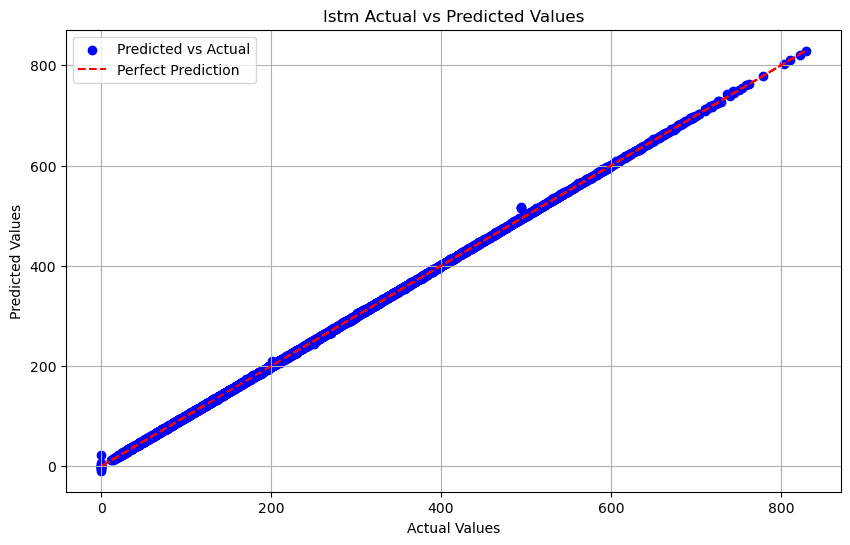

In [59]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lstm_predictions_test, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('lstm Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# catboost model 

In [61]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import time

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.5],  # Learning rate values to try
    'depth': [4, 5, 6, 7, 8, 9],  # Depth values to try
    'iterations': [100, 200, 300, 400, 500]  # Number of iterations to try
}

# Initialize the CatBoost model
catboost_model = CatBoostRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Start timing
start_time = time.time()

# Perform Grid Search
grid_search.fit(X_train, y_train)

# End timing
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed Time: {:.2f} seconds".format(elapsed_time))

# Get the best parameters and best model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_catboost_model = grid_search.best_estimator_

# Make predictions on train and test sets
catboost_predictions_train = best_catboost_model.predict(X_train)
catboost_predictions_test = best_catboost_model.predict(X_test)

# Calculate evaluation metrics for train set
catboost_rmse_train = np.sqrt(mean_squared_error(y_train, catboost_predictions_train))
catboost_mae_train = mean_absolute_error(y_train, catboost_predictions_train)
catboost_r2_train = r2_score(y_train, catboost_predictions_train)
catboost_mse_train = mean_squared_error(y_train, catboost_predictions_train)

# Calculate evaluation metrics for test set
catboost_rmse_test = np.sqrt(mean_squared_error(y_test, catboost_predictions_test))
catboost_mae_test = mean_absolute_error(y_test, catboost_predictions_test)
catboost_r2_test = r2_score(y_test, catboost_predictions_test)
catboost_mse_test = mean_squared_error(y_test, catboost_predictions_test)

# Print evaluation metrics for train set
print("CatBoost Training RMSE:", catboost_rmse_train)
print("CatBoost Training MAE:", catboost_mae_train)
print("CatBoost Training R^2 score:", catboost_r2_train)
print("CatBoost Training MSE score:", catboost_mse_train)

# Print evaluation metrics for test set
print("\nCatBoost Test RMSE:", catboost_rmse_test)
print("CatBoost Test MAE:", catboost_mae_test)
print("CatBoost Test R^2 score:", catboost_r2_test)
print("CatBoost Test MSE score:", catboost_mse_test)


Fitting 3 folds for each of 120 candidates, totalling 360 fits
0:	learn: 93.4095841	total: 54.2ms	remaining: 27.1s
1:	learn: 76.4364563	total: 127ms	remaining: 31.6s
2:	learn: 62.8689082	total: 171ms	remaining: 28.4s
3:	learn: 51.7252346	total: 214ms	remaining: 26.5s
4:	learn: 42.8424904	total: 262ms	remaining: 26s
5:	learn: 35.7650651	total: 328ms	remaining: 27s
6:	learn: 30.0741079	total: 380ms	remaining: 26.8s
7:	learn: 25.6102759	total: 436ms	remaining: 26.8s
8:	learn: 22.0264160	total: 489ms	remaining: 26.7s
9:	learn: 19.2516888	total: 543ms	remaining: 26.6s
10:	learn: 17.1650786	total: 598ms	remaining: 26.6s
11:	learn: 15.4596809	total: 641ms	remaining: 26.1s
12:	learn: 14.0806405	total: 683ms	remaining: 25.6s
13:	learn: 13.0962970	total: 725ms	remaining: 25.2s
14:	learn: 12.3124904	total: 765ms	remaining: 24.7s
15:	learn: 11.4922279	total: 809ms	remaining: 24.5s
16:	learn: 10.9177007	total: 856ms	remaining: 24.3s
17:	learn: 10.4980646	total: 893ms	remaining: 23.9s
18:	learn: 10.

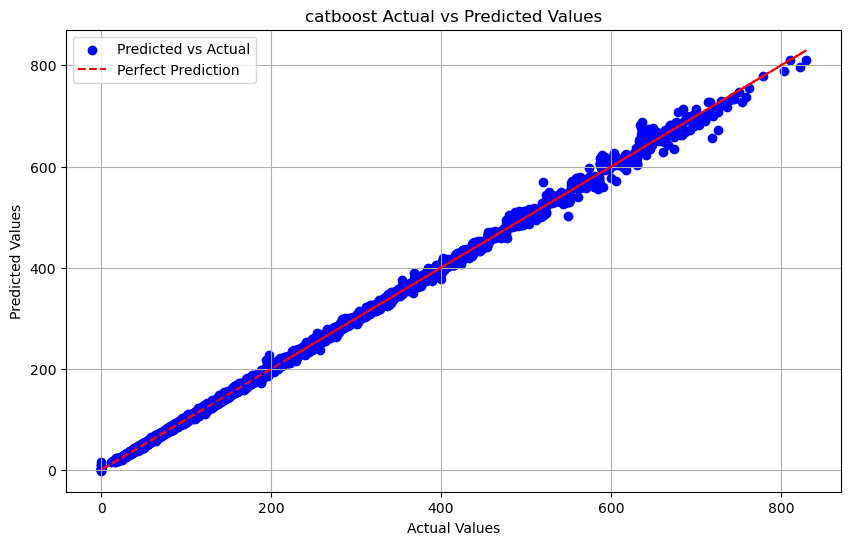

In [63]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, catboost_predictions_test, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('catboost Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Initialize RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with RandomForestRegressor and parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Start time
start_time = time.time()
print("Start time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# End time
end_time = time.time()
print("\nEnd time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))

# Total execution time
execution_time = end_time - start_time
print("Total execution time:", execution_time, "seconds")

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the training set and test set using the best model
rf_predictions_train = best_rf_model.predict(X_train)
rf_predictions_test = best_rf_model.predict(X_test)

# Calculate evaluation metrics for training set using the best model
rf_mse_train = mean_squared_error(y_train, rf_predictions_train)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_mae_train = mean_absolute_error(y_train, rf_predictions_train)
rf_r2_train = r2_score(y_train, rf_predictions_train)

# Print best parameters found by grid search
print("\nBest Parameters:", grid_search.best_params_)

# Print evaluation metrics for training set using the best model
print("\nRandom Forest Training Metrics:")
print("MSE:", rf_mse_train)
print("RMSE:", rf_rmse_train)
print("MAE:", rf_mae_train)
print("R^2 score:", rf_r2_train)

# Calculate evaluation metrics for test set using the best model
rf_mse_test = mean_squared_error(y_test, rf_predictions_test)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_mae_test = mean_absolute_error(y_test, rf_predictions_test)
rf_r2_test = r2_score(y_test, rf_predictions_test)

# Print evaluation metrics for test set using the best model
print("\nRandom Forest Test Metrics:")
print("MSE:", rf_mse_test)
print("RMSE:", rf_rmse_test)
print("MAE:", rf_mae_test)
print("R^2 score:", rf_r2_test)


Start time: 2024-05-01 17:27:53
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 4.1min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 4.1min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 4.0min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 4.1min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 4.0min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 8.1min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 8.7min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 9.1min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 5.8min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 5.9min
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time= 

In [75]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are already defined (e.g., from synthetic data generation or your dataset)

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBRegressor model
xgb_model = XGBRegressor()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_test = xgb_model.predict(X_test)

# Calculate evaluation metrics for train set
xgb_rmse_train = np.sqrt(mean_squared_error(y_train, xgb_pred_train))
xgb_mae_train = mean_absolute_error(y_train, xgb_pred_train)
xgb_r2_train = r2_score(y_train, xgb_pred_train)
xgb_mse_train = mean_squared_error(y_train, xgb_pred_train)

# Calculate evaluation metrics for test set
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_pred_test))
xgb_mae_test = mean_absolute_error(y_test, xgb_pred_test)
xgb_r2_test = r2_score(y_test, xgb_pred_test)
xgb_mse_test = mean_squared_error(y_test, xgb_pred_test)

# Print evaluation metrics for train set
print("XGB Training RMSE:", xgb_rmse_train)
print("XGB Training MAE:", xgb_mae_train)
print("XGB Training R^2 score:", xgb_r2_train)
print("XGB Training MSE score:", xgb_mse_train)

# Print evaluation metrics for test set
print("\nXGB Test RMSE:", xgb_rmse_test)
print("XGB Test MAE:", xgb_mae_test)
print("XGB Test R^2 score:", xgb_r2_test)
print("XGB Test MSE score:", xgb_mse_test)

XGB Training RMSE: 1.6938435925800557
XGB Training MAE: 1.1909500681431646
XGB Training R^2 score: 0.9997817970209901
XGB Training MSE score: 2.86910611612451

XGB Test RMSE: 1.9948399234243588
XGB Test MAE: 1.310949864318404
XGB Test R^2 score: 0.9996990868919948
XGB Test MSE score: 3.9793863200877015


In [ ]:
# Xgboost actual vs predicted

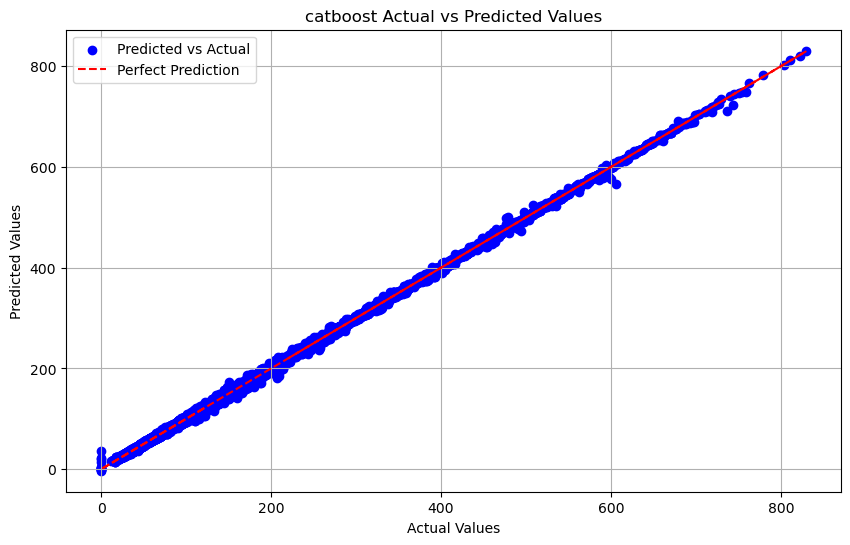

In [77]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred_test, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('catboost Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# predicted vs actual plot

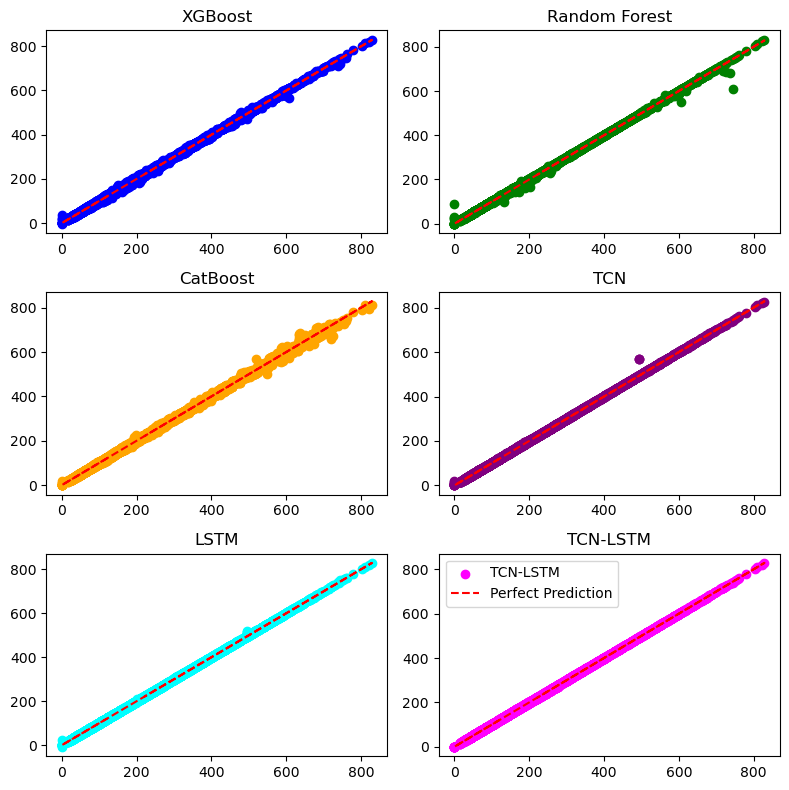

In [81]:
import matplotlib.pyplot as plt

# Create a figure and axis objects with subplots
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

# Plot XGBoost predictions
axes[0, 0].scatter(y_test, xgb_pred_test, color='blue', label='XGBoost')
axes[0, 0].plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
axes[0, 0].set_title('XGBoost')

# Plot Random Forest predictions
axes[0, 1].scatter(y_test, rf_predictions_test, color='green', label='Random Forest')
axes[0, 1].plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
axes[0, 1].set_title('Random Forest')

# Plot CatBoost predictions
axes[1, 0].scatter(y_test, catboost_predictions_test, color='orange', label='CatBoost')
axes[1, 0].plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
axes[1, 0].set_title('CatBoost')

# Plot TCN predictions
axes[1, 1].scatter(y_test, tcn_test_pred, color='purple', label='TCN')
axes[1, 1].plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
axes[1, 1].set_title('TCN')

# Plot LSTM predictions
axes[2, 0].scatter(y_test, lstm_predictions_test, color='cyan', label='LSTM')
axes[2, 0].plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
axes[2, 0].set_title('LSTM')

# Plot TCN-LSTM predictions
axes[2, 1].scatter(y_test, combined_test_pred_final, color='magenta', label='TCN-LSTM')
axes[2, 1].plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
axes[2, 1].set_title('TCN-LSTM')

# Add legend to one of the subplots
axes[2, 1].legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# evaluation mstrices diagram 

C:\Users\DELL\AppData\Local\Temp\ipykernel_5036\908559148.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_models[metric], rotation=45)


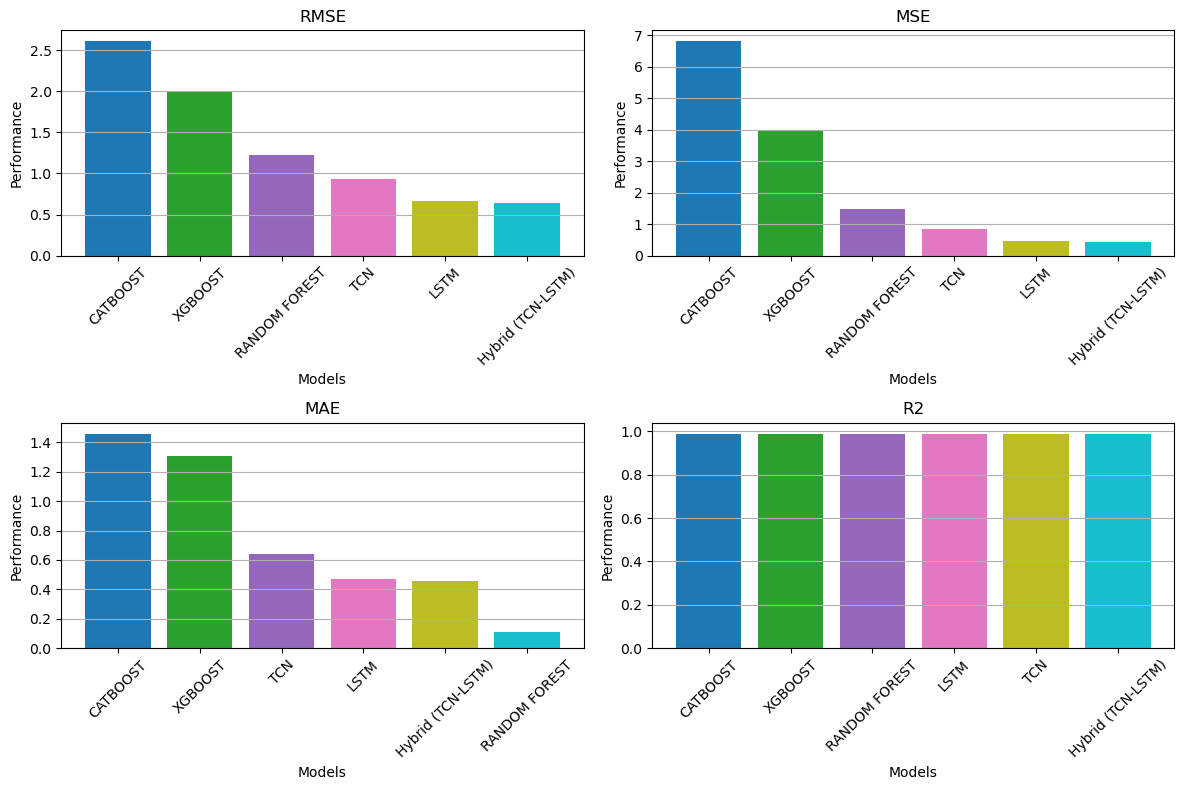

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their evaluation metrics
models = ['CATBOOST', 'XGBOOST', 'RANDOM FOREST', 'LSTM', 'TCN', 'Hybrid (TCN-LSTM)']
metrics = ['RMSE', 'MSE', 'MAE', 'R2']
data = {
    'CATBOOST': [2.61, 6.82, 1.46, 0.99],
    'XGBOOST': [1.99, 3.97, 1.31, 0.99],
    'RANDOM FOREST': [1.22, 1.49, 0.11, 0.99],
    'LSTM': [0.67, 0.45, 0.47, 0.99],
    'TCN': [0.93, 0.85, 0.64, 0.99],
    'Hybrid (TCN-LSTM)': [0.64, 0.42, 0.46, 0.99]
}

# Sort models based on each metric
sorted_models = {}
for metric in metrics:
    sorted_models[metric] = sorted(models, key=lambda x: data[x][metrics.index(metric)], reverse=True)

# Define colors
colors = plt.cm.tab10(np.linspace(0, 1, len(models)))

# Plot each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    metric = metrics[i]
    sorted_values = [data[model][i] for model in sorted_models[metric]]
    ax.bar(sorted_models[metric], sorted_values, color=colors)
    ax.set_title(metric)
    ax.set_ylabel('Performance')
    ax.set_xlabel('Models')
    ax.set_xticklabels(sorted_models[metric], rotation=45)
    ax.grid(axis='y')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# building xgboost model

In [93]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBRegressor model
xgb_model = XGBRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3]
}


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the training and test data using the best model
y_pred_train = best_xgb_model.predict(X_train)
y_pred_test = best_xgb_model.predict(X_test)

# Calculate evaluation metrics for train set using the best model
xgb_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
xgb_mae_train = mean_absolute_error(y_train, y_pred_train)
xgb_r2_train = r2_score(y_train, y_pred_train)
xgb_mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate evaluation metrics for test set using the best model
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
xgb_mae_test = mean_absolute_error(y_test, y_pred_test)
xgb_r2_test = r2_score(y_test, y_pred_test)
xgb_mse_test = mean_squared_error(y_test, y_pred_test)

# Print best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Print evaluation metrics for train set using the best model
print("\nXGB Training RMSE:", xgb_rmse_train)
print("XGB Training MAE:", xgb_mae_train)
print("XGB Training R^2 score:", xgb_r2_train)
print("XGB Training MSE score:", xgb_mse_train)

# Print evaluation metrics for test set using the best model
print("\nXGB Test RMSE:", xgb_rmse_test)
print("XGB Test MAE:", xgb_mae_test)
print("XGB Test R^2 score:", xgb_r2_test)
print("XGB Test MSE score:", xgb_mse_test)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   4.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   3.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   4.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   9.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  11.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  10.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=  16.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=  16.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=  25.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=  11.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   8.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_es

In [ ]:
# building SVR  model

In [386]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming X and y are your feature matrix and target vector respectively
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVR with RBF kernel
svr_rbf = SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)

# Train SVR model
svr_rbf.fit(X_train, y_train)

# Predict on training set
y_train_pred = svr_rbf.predict(X_train)

# Predict on test set
y_test_pred = svr_rbf.predict(X_test)

# Calculate evaluation metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics for training set
print("SVR Training Set Metrics:")
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("MAE:", train_mae)
print("R^2 score:", train_r2)

# Print evaluation metrics for test set
print("\nSVR Test Set Metrics:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("MAE:", test_mae)
print("R^2 score:", test_r2)


SVR Training Set Metrics:
MSE: 648.6457488084493
RMSE: 25.468524668862333
MAE: 13.4532130812216
R^2 score: 0.950668804504412

SVR Test Set Metrics:
MSE: 643.6199394320283
RMSE: 25.369665733549354
MAE: 13.62667130136506
R^2 score: 0.9513307679199277
